## Ocean Circulation Diagnostics

#### PATH to import function


In [2]:
import os
# print(os.getcwd())
os.chdir("..")
print(os.getcwd())

/home/b/b382397/AQUA/diagnostics/global_ocean


### Import Modules

In [3]:
%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
import global_ocean_func3 as fn
from aqua.util import load_yaml

FDB5 binary library not present on system, disabling FDB support.


### Import Data

In [4]:
# Here we read one of the reference NextGEMS Cycle 3 simulations
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")

# And we extract the Potential Temperature and Practical Salinity fields, resampling in yearly means
# Yearly means are more adequate to identify  drifts as they are not contaminated by seasonal cycle signals
yearly_data = reader.retrieve()[["ocpt","so"]].resample(time="Y").mean()
yearly_data=yearly_data.rename({"nz1":"lev"})

### Functions:
There are several function in ocean_circulation_func

Main two diagnostics functions are:
1. ##### hovmoller_plot

hovmoller_plot(data, region, type= None , latS: float=None, latN: float=None, lonW: float=None,
                            lonE: float=None, output= False, output_dir= "output")

All you need to give is model data and need to specify the region or custom (lat, lon box) and the type if you want anomaly or StdAnomaly or FullValue. And, you will get temperature, and salinity profile by depth and time. 

2. ##### time_series
time_series(data, region=None, type = None, customise_level=False, levels=None, latS: float=None, latN: float=None, lonW: float=None,
                            lonE: float=None,  output= True, output_dir = "output")

All you need to give is model data and need to specify the region or custom (lat, lon box) and the the type if you want anomaly or StdAnomaly or FullValue. And, you will get the time series plot of Temperature and salinity.

In [5]:
config = load_yaml("config.yaml")
hovmoller_config= config["hovmoller_plot"]
time_series_config= config["time_series"]
multilevel_trend_config= config["multilevel_trend"]

print(hovmoller_config)
print(time_series_config)
print(multilevel_trend_config)


{'region': 'Global Ocean', 'latS': None, 'latN': None, 'lonE': None, 'lonW': None, 'type': 'FUllvalue', 'output': True, 'output_dir': './output'}
{'region': 'Global Ocean', 'latS': None, 'latN': None, 'lonE': None, 'lonW': None, 'type': 'anomally', 'output': True, 'output_dir': './output'}
{'region': 'Global Ocean', 'latS': None, 'latN': None, 'lonE': None, 'lonW': None, 'output': True, 'output_dir': './output'}


2023-07-10 19:45:27,104 - INFO - Selected for this region (latitude -90.0 to 90.0, longitude 0.0 to 360.0)
2023-07-10 19:45:27,148 - INFO - Data processed for fullvalue
2023-07-10 19:45:27,150 - INFO - Hovmoller plotting in process
2023-07-10 19:46:19,144 - INFO - Figure and data used for this plot are saved here: output/hovmoller_plot_FullValue_global_ocean_mean_20230710_194527


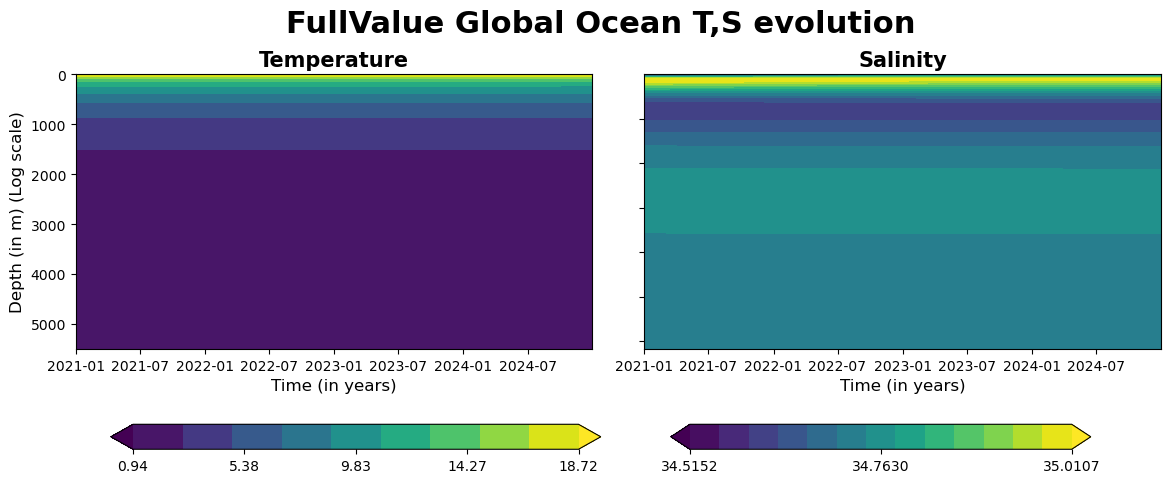

In [121]:
fn.hovmoller_plot(yearly_data, region= "Global Ocean",type = 'FullValue', output= True, output_dir= "output")


2023-07-10 19:46:19,897 - INFO - Selected for this region (latitude -90.0 to 90.0, longitude 0.0 to 360.0)
2023-07-10 19:46:19,946 - INFO - Data processed for stdanomaly
2023-07-10 19:46:19,947 - INFO - Hovmoller plotting in process
2023-07-10 19:47:09,253 - INFO - Figure and data used for this plot are saved here: output/hovmoller_plot_StdAnomaly_global_ocean_mean_20230710_194619


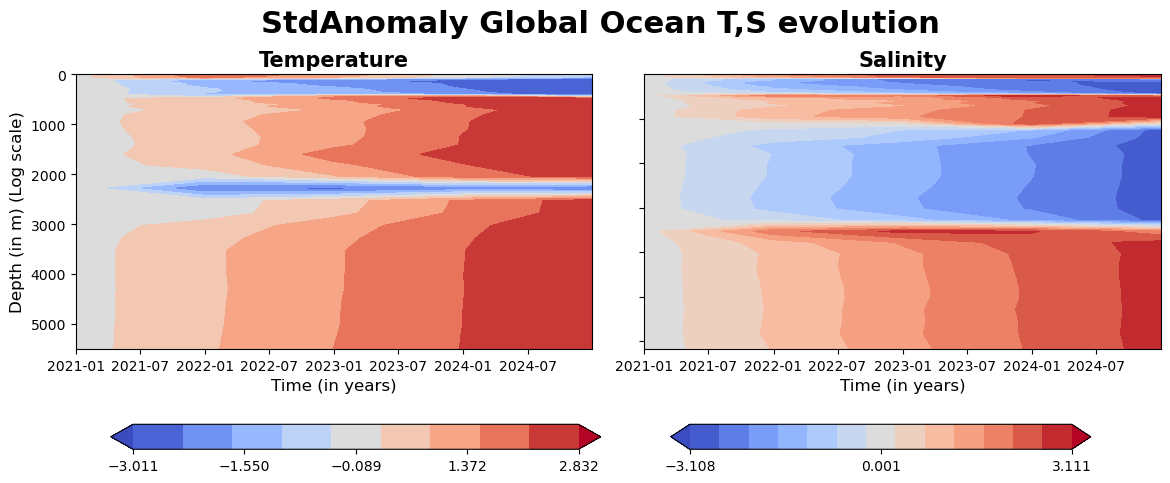

In [122]:
fn.hovmoller_plot(data = yearly_data, region= "Global Ocean",type = 'StdAnomaly', output= True, output_dir= "output")


2023-07-10 19:47:09,864 - INFO - Selected for this region (latitude -90.0 to 90.0, longitude 0.0 to 360.0)
2023-07-10 19:47:09,897 - INFO - Data processed for anomaly
2023-07-10 19:47:09,898 - INFO - Hovmoller plotting in process
2023-07-10 19:47:59,666 - INFO - Figure and data used for this plot are saved here: output/hovmoller_plot_anomaly_global_ocean_mean_20230710_194709


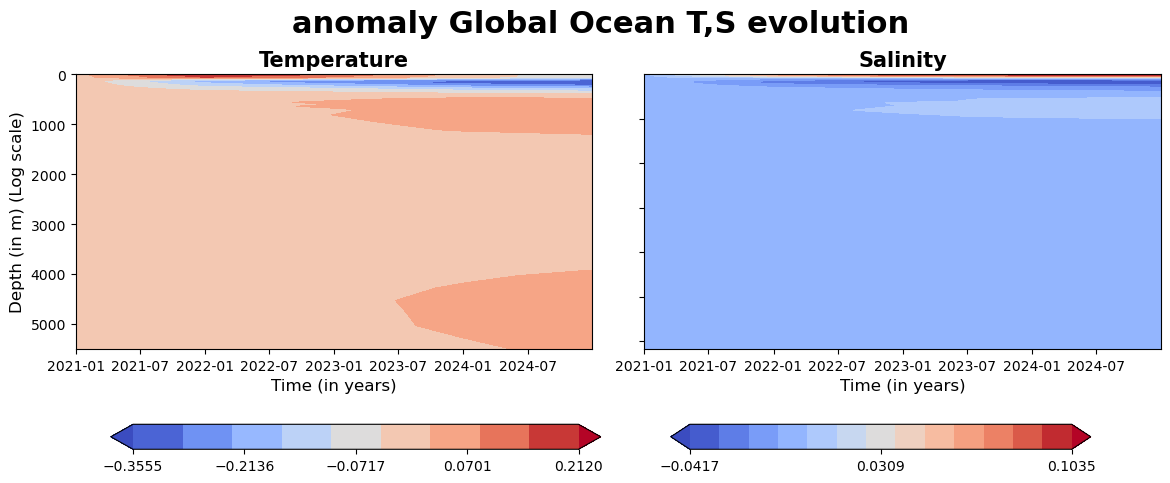

In [123]:
fn.hovmoller_plot(data = yearly_data, region= "Global Ocean",type = 'anomaly', output= True, output_dir= "output")


2023-07-10 20:30:04,618 - INFO - Selected for this region (latitude -90.0 to 90.0, longitude 0.0 to 360.0)
2023-07-10 20:30:04,656 - INFO - Data processed for fullvalue
2023-07-10 20:30:04,657 - INFO - Time series plot is in process


Global Ocean


2023-07-10 20:31:24,438 - INFO -  Figure and data used in the plot, saved here : output/stratification_FullValue_global_ocean_mean_20230710_203117


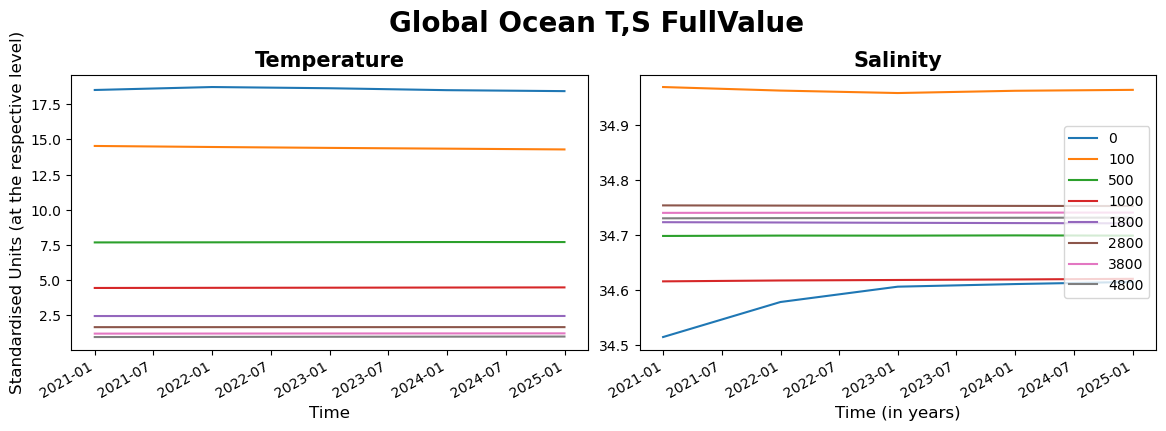

In [7]:
fn.time_series(yearly_data,'Global Ocean', type="FullValue",customise_level=False, levels=list,output = True,  output_dir="output")

2023-07-10 14:46:54,802 - INFO - Selected for this region (latitude -35.0 to 65.0, longitude -80.0 to 30.0)
2023-07-10 14:46:54,837 - INFO - Data processed for fullvalue
2023-07-10 14:46:54,837 - INFO - Time series plot is in process
2023-07-10 14:48:11,512 - INFO -  Figure and data used in the plot, saved here : output/20230710_144804_stratification_FullValue_atlantic_ocean_mean


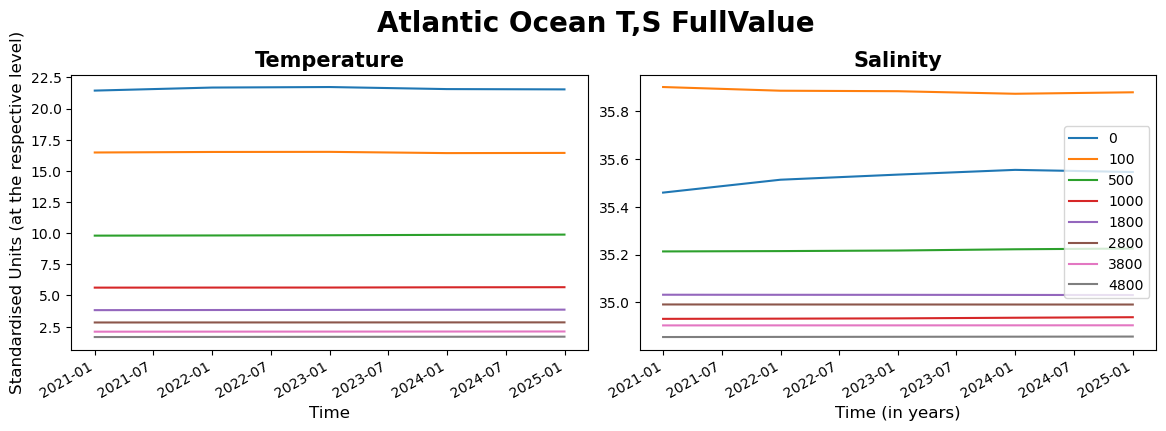

In [ ]:
fn.time_series(yearly_data,'Atlantic Ocean', type="FullValue",customise_level=False, levels=list,output = True,  output_dir="output")

2023-07-10 14:48:12,295 - INFO - Selected for this region (latitude -35.0 to 65.0, longitude -80.0 to 30.0)
2023-07-10 14:48:12,326 - INFO - Data processed for fullvalue
2023-07-10 14:48:12,327 - INFO - Time series plot is in process
2023-07-10 14:49:01,653 - INFO -  Figure and data used in the plot, saved here : output/20230710_144854_stratification_FullValue_atlantic_ocean_mean


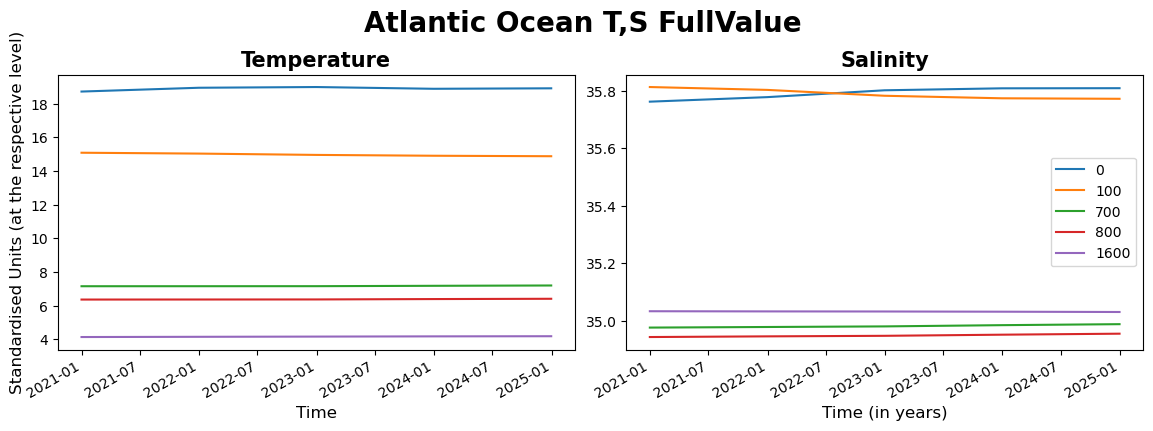

In [ ]:
fn.time_series(yearly_data,'Atlantic Ocean', type="FullValue",customise_level=True, levels=[50, 150, 750, 900, 1600], output = True,  output_dir="output")

2023-07-10 19:33:09,851 - INFO - Selected for this region (latitude -90.0 to 90.0, longitude 0.0 to 360.0)
2023-07-10 19:33:47,589 - INFO - Trend value calculated
2023-07-10 19:33:50,073 - INFO - Figure and data used for this plot are saved here: output/stratification___global_ocean_mean_20230710_193348


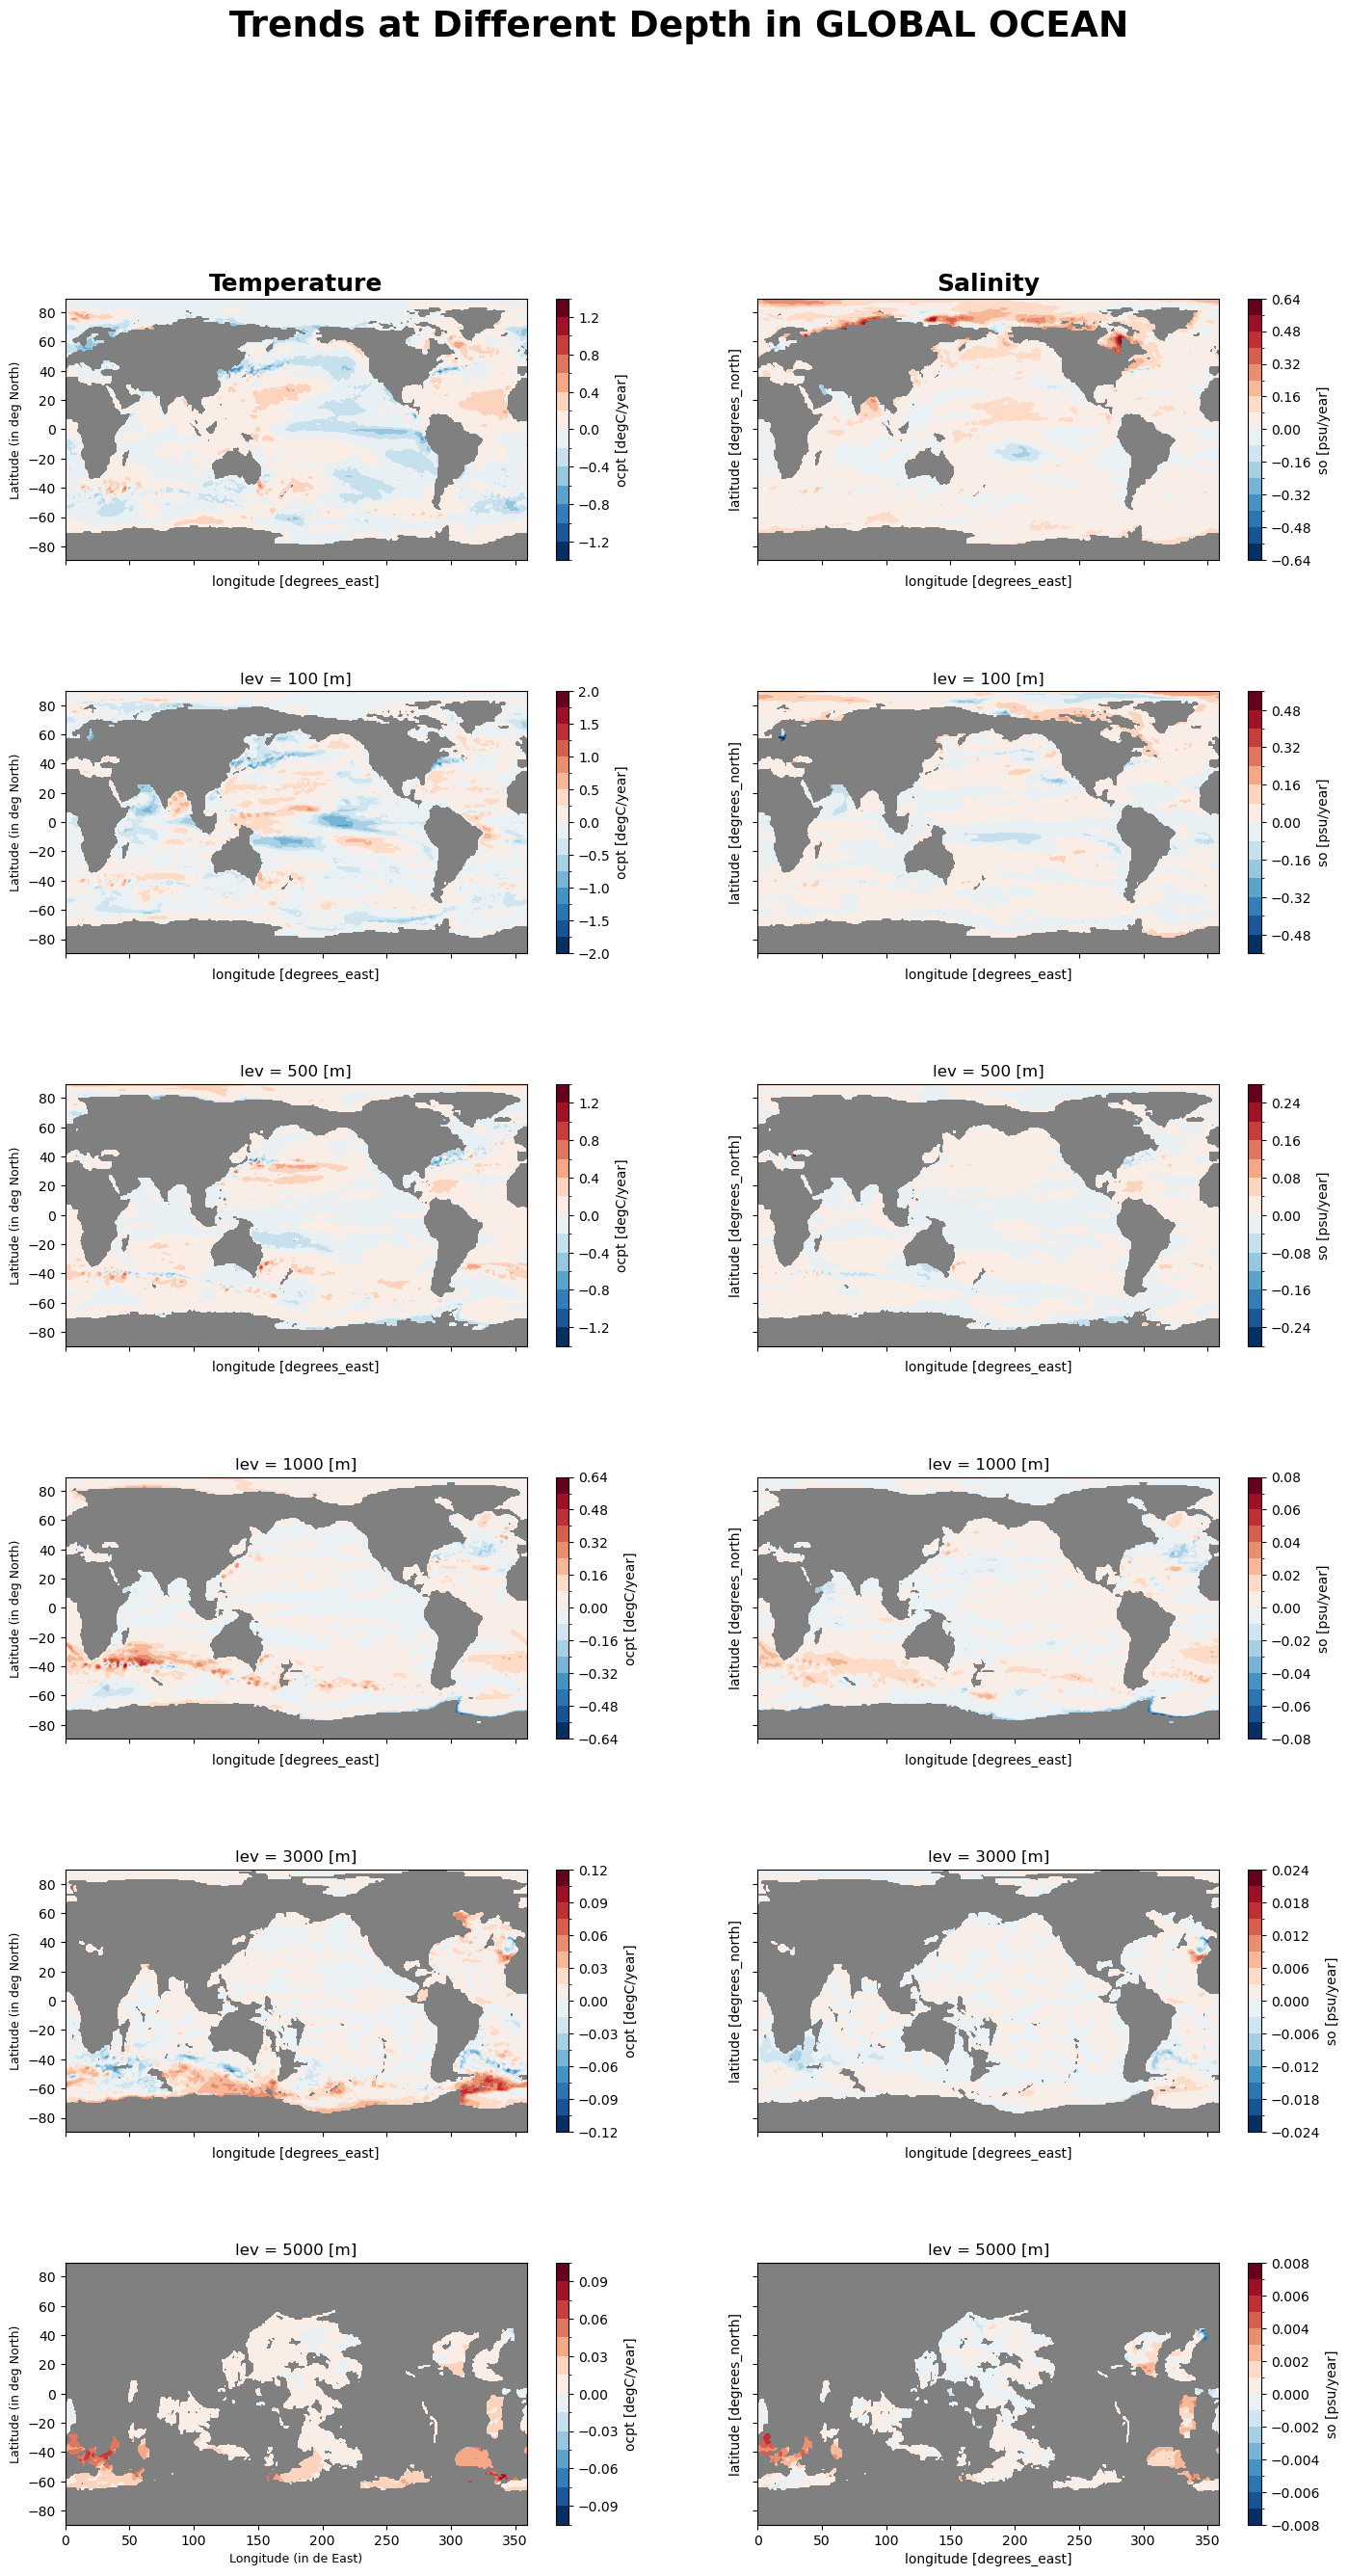

In [ ]:
fn.multilevel_t_s_trend_plot(yearly_data,'Global Ocean', customise_level=False, levels=None,
                            output= True, output_dir = "output")


2023-07-10 19:37:27,616 - INFO - Selected for this region (latitude -35.0 to 65.0, longitude -80.0 to 30.0)
2023-07-10 19:38:01,685 - INFO - Trend value calculated
2023-07-10 19:38:03,776 - INFO - Figure and data used for this plot are saved here: output/stratification___atlantic_ocean_mean_20230710_193802


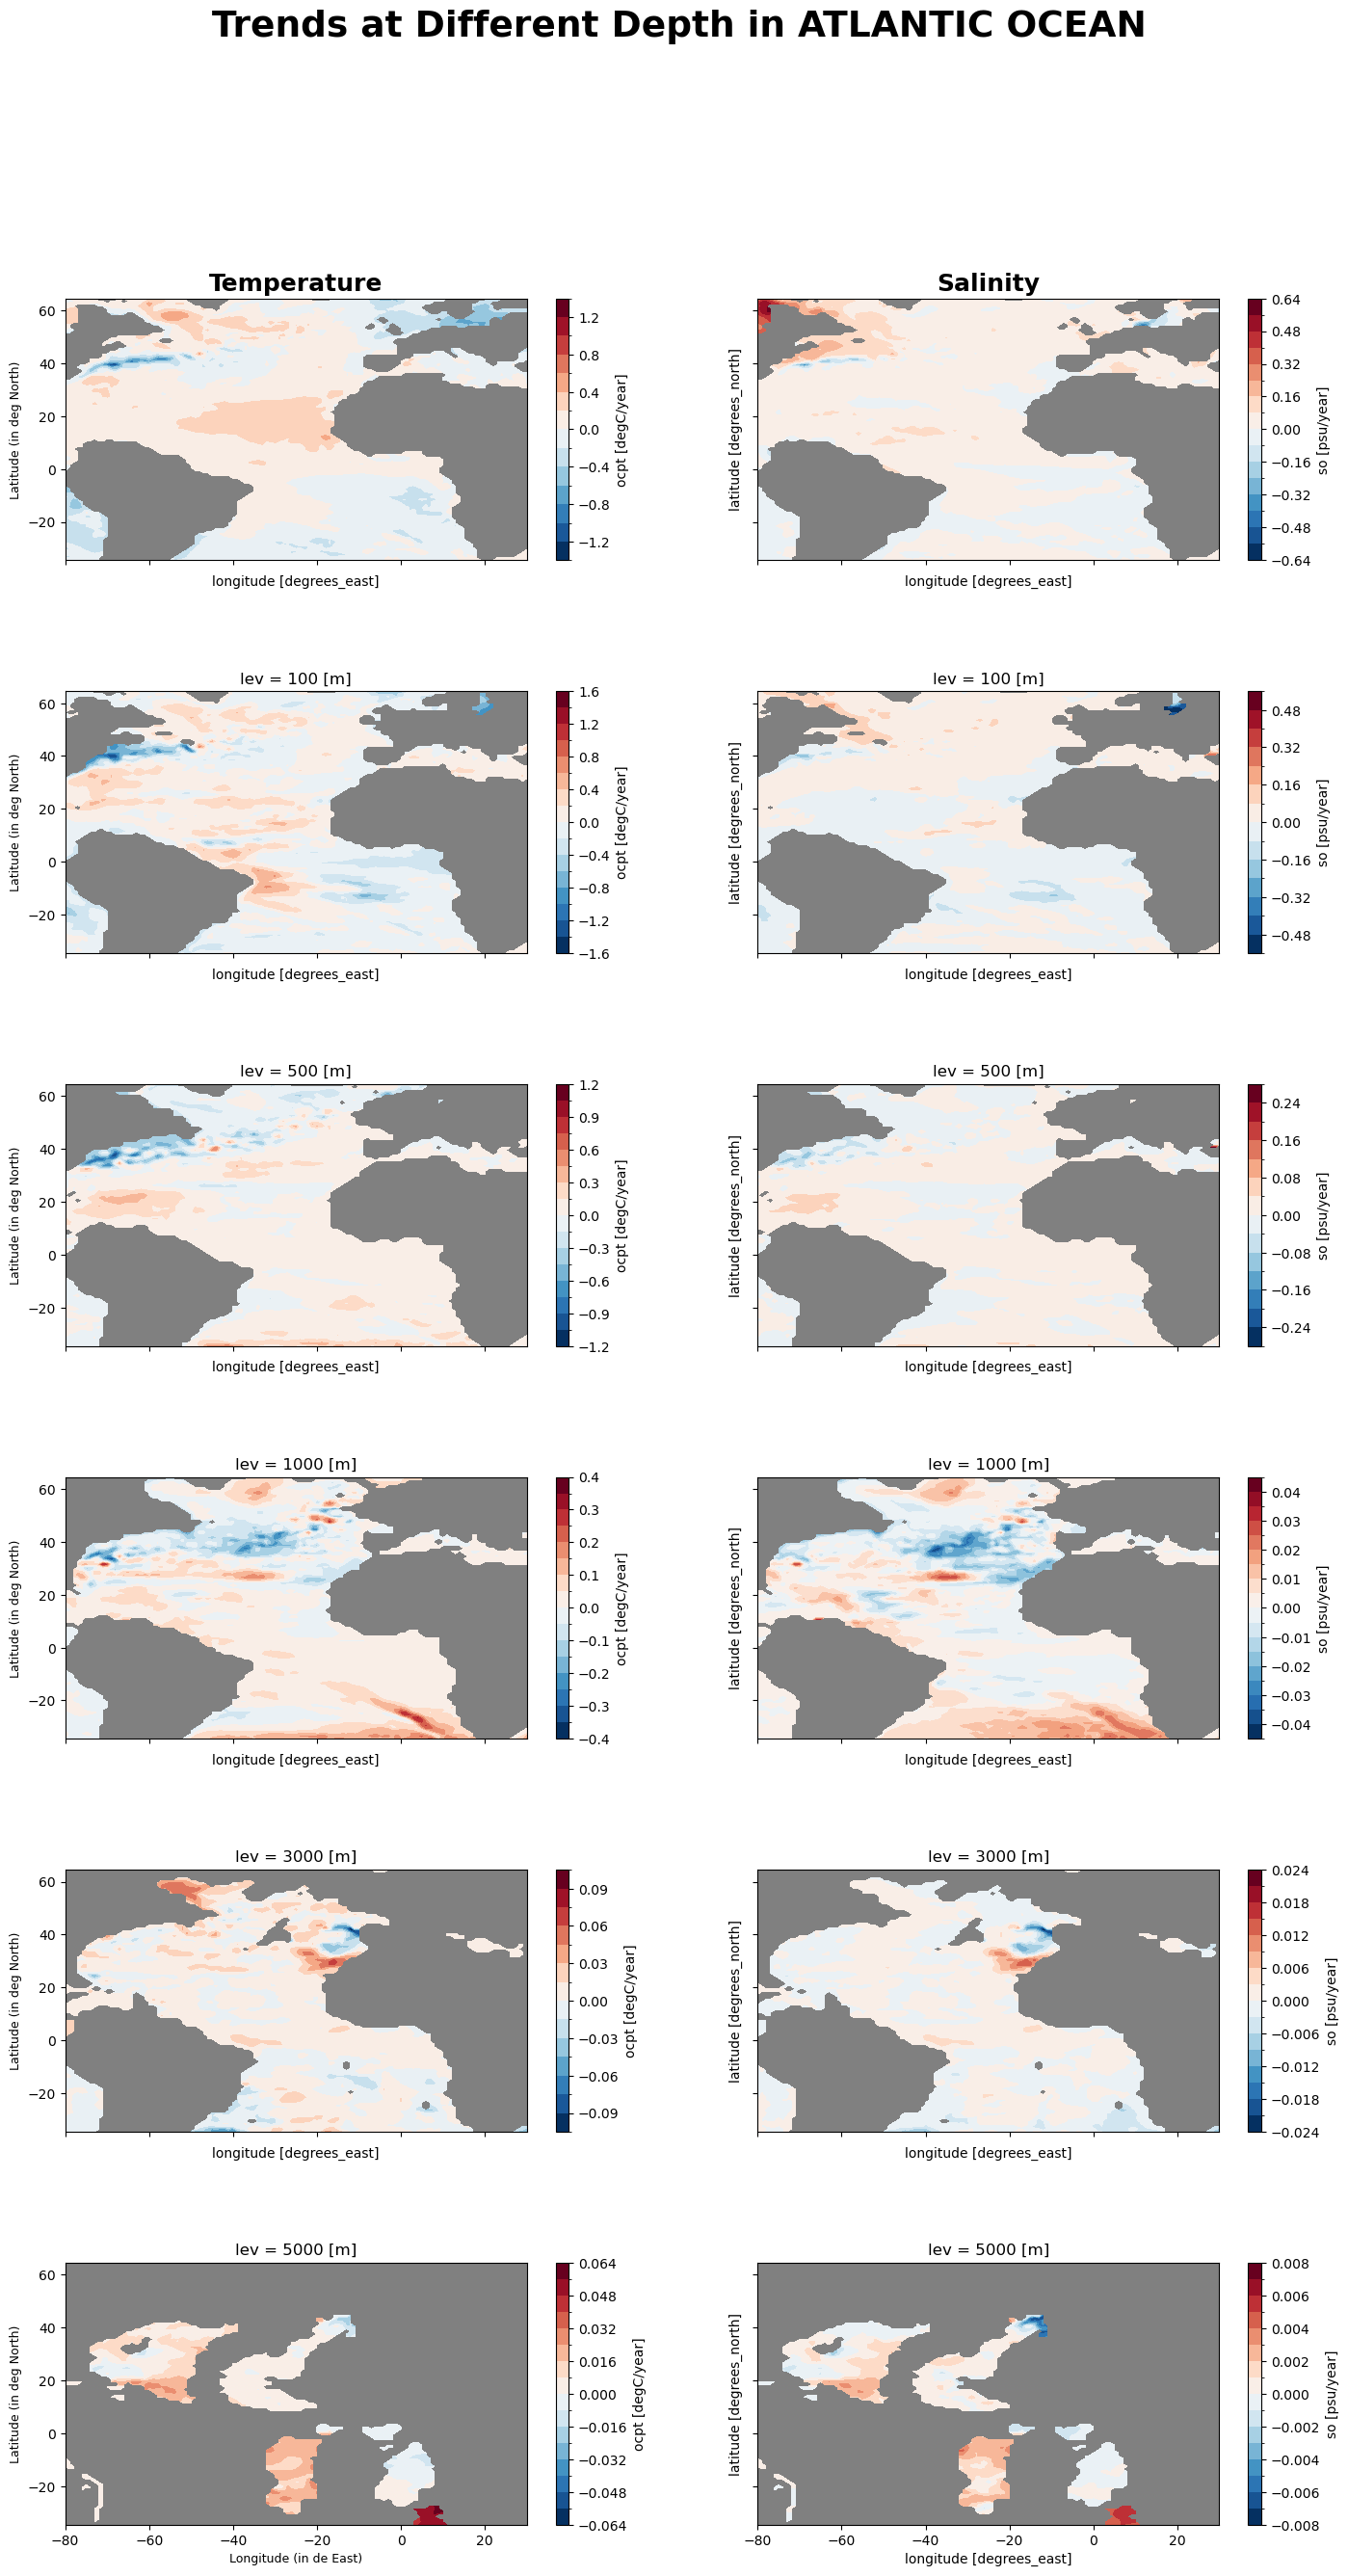

In [ ]:
fn.multilevel_t_s_trend_plot(yearly_data,'Atlantic Ocean', customise_level=False, levels=None,
                            output= True, output_dir = "output")


2023-07-10 20:14:53,623 - INFO - Trend value calculated
2023-07-10 20:14:53,624 - INFO - Selected for this region (latitude -30.0 to 30.0, longitude 30 to 110.0)
2023-07-10 20:14:53,990 - INFO - Figure and data used for this plot are saved here: output/zonal_mean_trend___indian_ocean__mean_20230710_201453


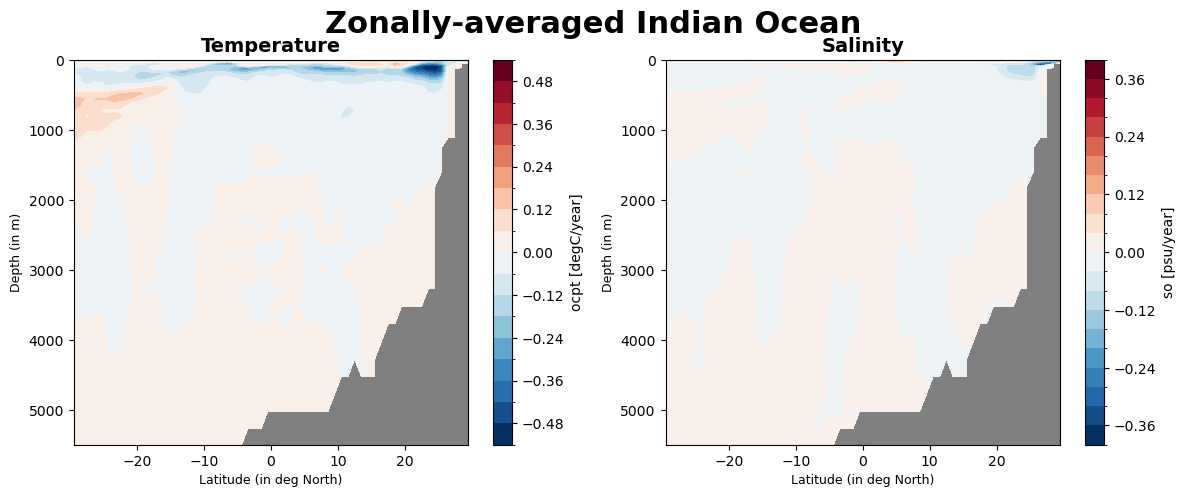

In [134]:
fn.zonal_mean_trend_plot(yearly_data, region= "Indian Ocean ", output= True, output_dir="output")